#  <center> <font style="color:rgb(100,109,254)"> GrabCut Algorithm </font> </center>


Grabcut is an effective classical image segmentation algorithm (Allows user  to segment out an object from the background), for good results some user interaction is required. GrabCut was designed by **Carsten Rother**, **Vladimir Kolmogorov** & **Andrew Blake** from Microsoft Research Cambridge, UK in their paper, [**"GrabCut": interactive foreground extraction using iterated graph cuts**](https://dl.acm.org/doi/10.1145/1186562.1015720) . This algorithm allows foreground extraction with minimal user interaction. 

### <font style="color:rgb(134,19,348)">What are Image Segmentation Algorithms ? </font>
In Image segmentation algorithms the aim is to decide for each pixel where do they belong, meaning we have to distinguish between background and foreground pixels and even between individual object pixels. 


### <font style="color:rgb(134,19,348)">Syntax in Opencv </font>

[```mask, bgdModel, fgdModel =  cv2.grabCut( img, mask, rect, bgdModel, fgdModel, iterCount[, mode] )```](https://docs.opencv.org/4.2.0/d7/d1b/group__imgproc__misc.html#ga909c1dda50efcbeaa3ce126be862b37f)

- `img`:	Input 8-bit 3-channel image.
- `mask`:	Input/output 8-bit single-channel mask. The mask is initialized by the function when mode is set to GC_INIT_WITH_RECT. Its elements may have one of the GrabCutClasses.
- `rect`:	ROI containing a segmented object. The pixels outside of the ROI are marked as "obvious background". The parameter is only used when mode==GC_INIT_WITH_RECT .
- `bgdModel`:	Temporary array for the background model. Do not modify it while you are processing the same image.
- `fgdModel`:	Temporary arrays for the foreground model. Do not modify it while you are processing the same image.
- `iterCount`:	Number of iterations the algorithm should make before returning the result. Note that the result can be refined with further calls with mode==GC_INIT_WITH_MASK or mode==GC_EVAL .
- `mode`:	Operation mode that could be one of the GrabCutModes

#### <font style="color:rgb(134,19,348)">Working: </font>
The math in grabcut is a bit involved but in essence Grabcut works by estimating the color distribution of the target object and that of the background using Gaussian mixture models. Then it segments out target object from background based on color dissimilarity. [For more on its theory read here](https://docs.opencv.org/4.1.0/d8/d83/tutorial_py_grabcut.html).

###  <font style="color:rgb(134,19,348)">Usage in Opencv </font>
In the start user draws a rectangle around the foreground region (foreground region should be completely inside this rectangle). Then the algorithm segments it iteratively to get the best result. That's it although in some cases, the segmentation won't be fine, like, it may have marked some foreground region as background and vice versa. In those cases, user need to do some fine touch-ups. Just give some strokes on the images where some faulty results are there. Strokes basically says *"Hey, this region should be foreground, you marked it background, correct it next time and vice versa"*. Then the next time with this extra information, you get better results.

We will work with 2 examples, in the first example we'll get clean results with just the initial bounding box and in the next example we'll work on an example which requires fine touch-ups to be correctly segmented.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## <font style="color:rgb(134,19,348)">Grabcut In Opencv: </font>

First let's see use the rectangular mode. We will load the image, create a mask image of the same size. We will then create **fgdModel** and **bgdModel**. We then let the user select rectangular params and Let the algorithm run for **n** iterations. Mode should be `cv2.GC_INIT_WITH_RECT` since we are using rectangle. Grabcut modifies the mask image. In the new mask image, pixels will be marked with four flags these are `background`, `foreground` or `probable background/foreground` denoted by, `0`,`1`,`2`,`3`. So we then modify this mask such that all 0-pixels and 2-pixels are put to 0 (ie. background) and all 1-pixels and 3-pixels are put to 1 (ie foreground pixels). Now our final mask is ready. Just multiply it with input image to get the segmented image.   

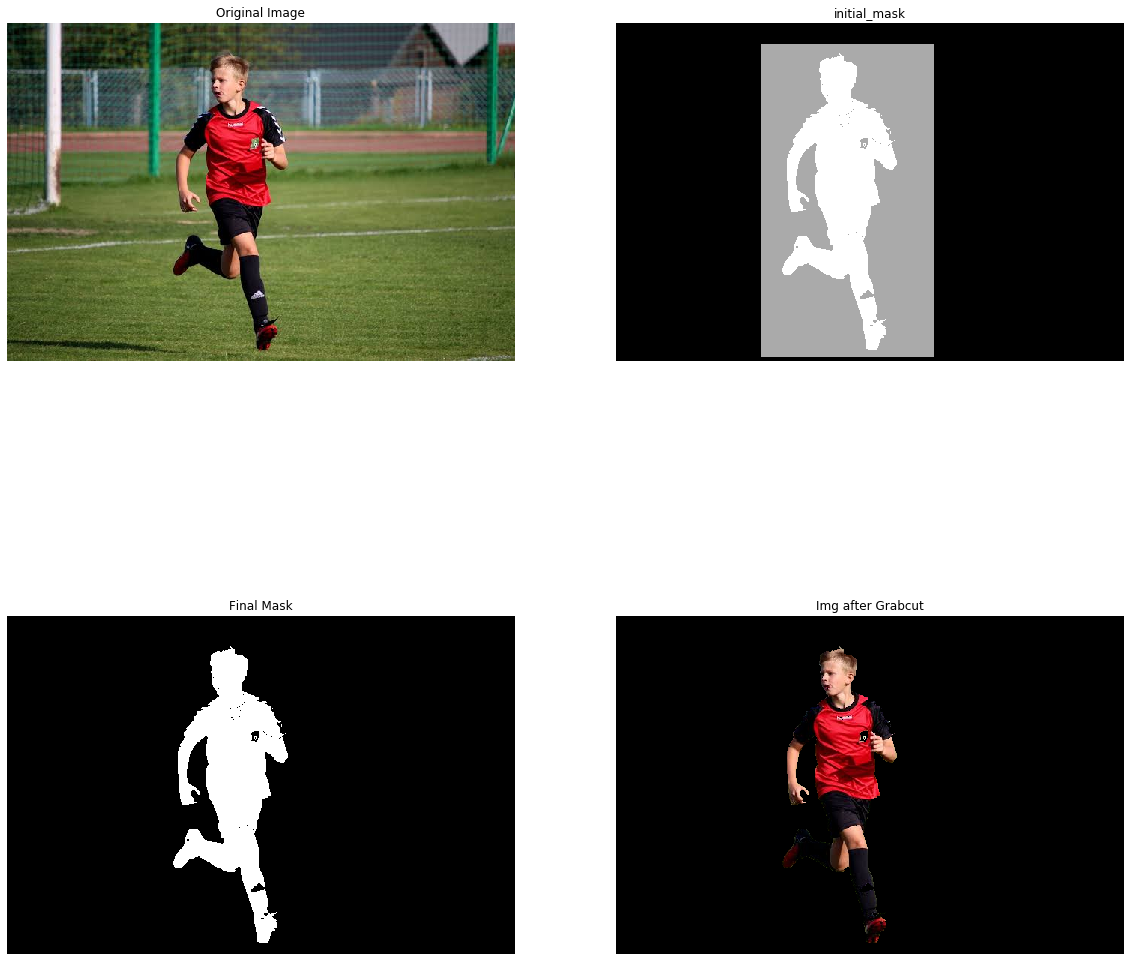

In [16]:
path = 'media/M4/grab.jpg'
imgorig = cv2.imread(path)
img = imgorig.copy()

img_name = path.split('/')[-1]

# Create an empty mask that will be passed into the grabcut
mask_zeros = np.zeros(img.shape[:2],np.uint8)

# These are temp background and foreground arrays which you have to pass in the grabcut function
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# You can either pass in a fix rectangular coordinates or select them via the selectROI method.
#rect = (50,50,450,290)
r = cv2.selectROI(img)  
rect = (r[0],r[1],r[2],r[3]) 

# Destroy the window you created with selectROI
cv2.destroyAllWindows()

# Apply the grabcut function
initial_mask , bgdModel,fgdModel = cv2.grabCut(img,mask_zeros,rect,bgdModel,fgdModel,2,cv2.GC_INIT_WITH_RECT)

# Convert all probable foreground pixels and foreground pixels to 1 and all the rest to 0
mask = np.where((initial_mask==2)|(initial_mask==0),0,1).astype('uint8')

# Muliply this mask with the original image (but first add an extra channel so sizes are equal)
img = imgorig * mask[:,:,np.newaxis]

plt.figure(figsize=[20,20])
plt.subplot(221);plt.imshow(imgorig[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(222);plt.imshow(initial_mask, cmap = 'gray');plt.title('initial_mask');plt.axis('off');
plt.subplot(223);plt.imshow(mask, cmap = 'gray');plt.title('Final Mask');plt.axis('off');
plt.subplot(224);plt.imshow(img[:,:,::-1]);plt.title("Img after Grabcut");plt.axis('off');

**Now in the above case the mask was segmented out easily but in most cases the initial mask you get with Grabcut with rect mode will not be perfect, consider the same code above with a different example below.**

Text(0.5, 1.0, 'Img after Grabcut')

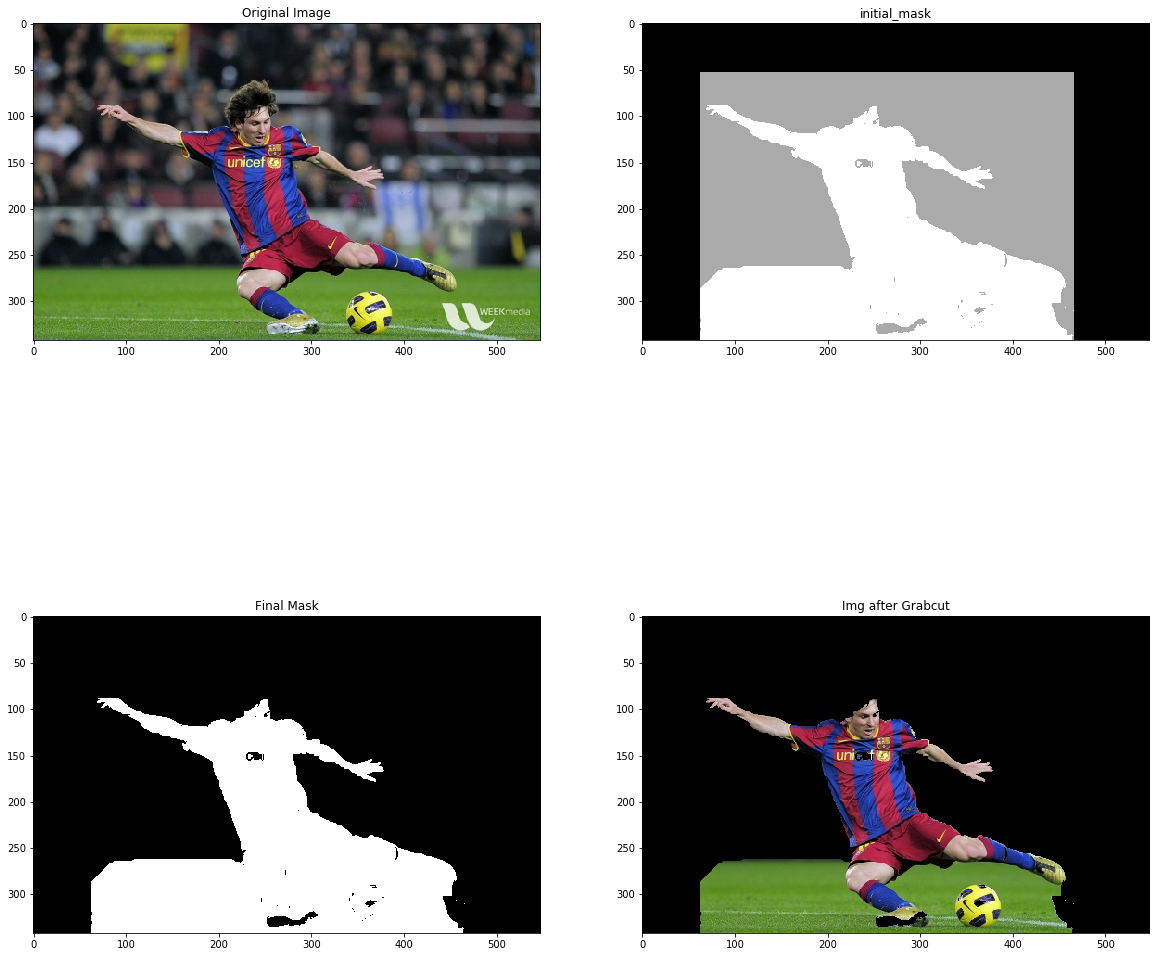

In [17]:
path = 'media/M4/messi5.jpg'
imgorig = cv2.imread(path)
img = imgorig.copy()

img_name = path.split('/')[-1]

# Create an empty mask that will be passed into the grabcut
mask_zeros = np.zeros(img.shape[:2],np.uint8)

# These are temp background and foreground arrays which you have to pass in the grabcut function
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

# You can either pass in a fix rectangular coordinates or select them via the selectROI method.
#rect = (50,50,450,290)
r = cv2.selectROI(img)  
rect = (r[0],r[1],r[2],r[3])

# Destroy the window you created with selectROI
cv2.destroyAllWindows()

# Apply the grabcut function
initial_mask , bgdModel,fgdModel = cv2.grabCut(img,mask_zeros,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

# Convert all probably foreground pixels and foreground pixels to 1 and all the rest to 0
mask = np.where((initial_mask==2)|(initial_mask==0),0,1).astype('uint8')

# Muliply this mask with the original image (but first add an extra channel so sizes are equal)
img = imgorig * mask[:,:,np.newaxis]

cv2.imwrite('media/M4/mask' + img_name , img)

plt.figure(figsize=[20,20])
plt.subplot(221);plt.imshow(imgorig[:,:,::-1]);plt.title("Original Image")
plt.subplot(222);plt.imshow(initial_mask, cmap = 'gray');plt.title('initial_mask')
plt.subplot(223);plt.imshow(mask, cmap = 'gray');plt.title('Final Mask')
plt.subplot(224);plt.imshow(img[:,:,::-1]);plt.title("Img after Grabcut")

No worries we will improve these results, with Grabcut in Mask Mode

## <font style="color:rgb(134,19,348)">Create a Manual Mask </font>
Now in the above example as you can see that some part were mislabeled as background and some mislabeled as foreground, so we need to do some fine touch ups on those parts and then use the grabcut in rect mode. <br>
Instead of creating a mask using the below script you can also create it in Photoshop. Now in this script we will color with white what was mislabeled as background and is actually foreground with white and vice versa with black, you can switch between colors by pressing `a`. 

In [19]:
drawing= False

cv2.namedWindow('Result',cv2.WINDOW_NORMAL) 

radius =10
x1 =None
x2 =0
y1 =0
y2=0
col = [255,255,255]

def draw_line(event,x,y,flags,param):
    global x1,y1, x2,y2,drawing

    if event == cv2.EVENT_MOUSEMOVE:
        x2= x
        y2= y       

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        x1=None
        
basename = 'media/M4/'        
imgname= 'mask' + img_name       
img = cv2.imread(basename + imgname)
imgmask = np.full(img.shape[:2],100, np.uint8)

cv2.setMouseCallback('Result',draw_line)
merger = cv2.addWeighted(imgorig, 0.25, img, 0.65, 0.0)

while True:
    if drawing:   
        if x1 is not None:                  
            merger = cv2.line(merger, (x1,y1),(x2,y2), col, 2)
            imgmask = cv2.line(imgmask, (x1,y1),(x2,y2), col, 2)

            x1= x2
            y1 = y2
        else:
            x1,y1 =x2,y2
    
    # Stack the mask and merged image together.
    mask_3 = cv2.cvtColor(imgmask, cv2.COLOR_GRAY2BGR)    
    stacked = np.hstack(( merger,mask_3))
    cv2.imshow('Result',stacked)

    
    k= cv2.waitKey(1)
    if k  == ord('c'):
        merger = cv2.addWeighted(imgorig, 0.15, img, 0.85, 0.0)
        imgmask = np.full(img.shape[:2],100, np.uint8)
    elif k  == ord('p'):
        cv2.imwrite(basename +'mask' +imgname,imgmask)
        break
    elif k  == ord('a'):
        if col == [255,255,255]:
            col = [0,0,0]
        else:
            col = [255,255,255]
 
    elif k & 0xFF == 27:
        break
cv2.destroyAllWindows()

## <font style="color:rgb(134,19,348)">Grabcut In Mask Mode: </font>
Now that we have manually marked the mistakes of Grabcut in rect Mode in a new mask, Now you use this mask to do proper segmentation of image with grabcut in mask mode. 

Text(0.5, 1.0, 'Segmented Image')

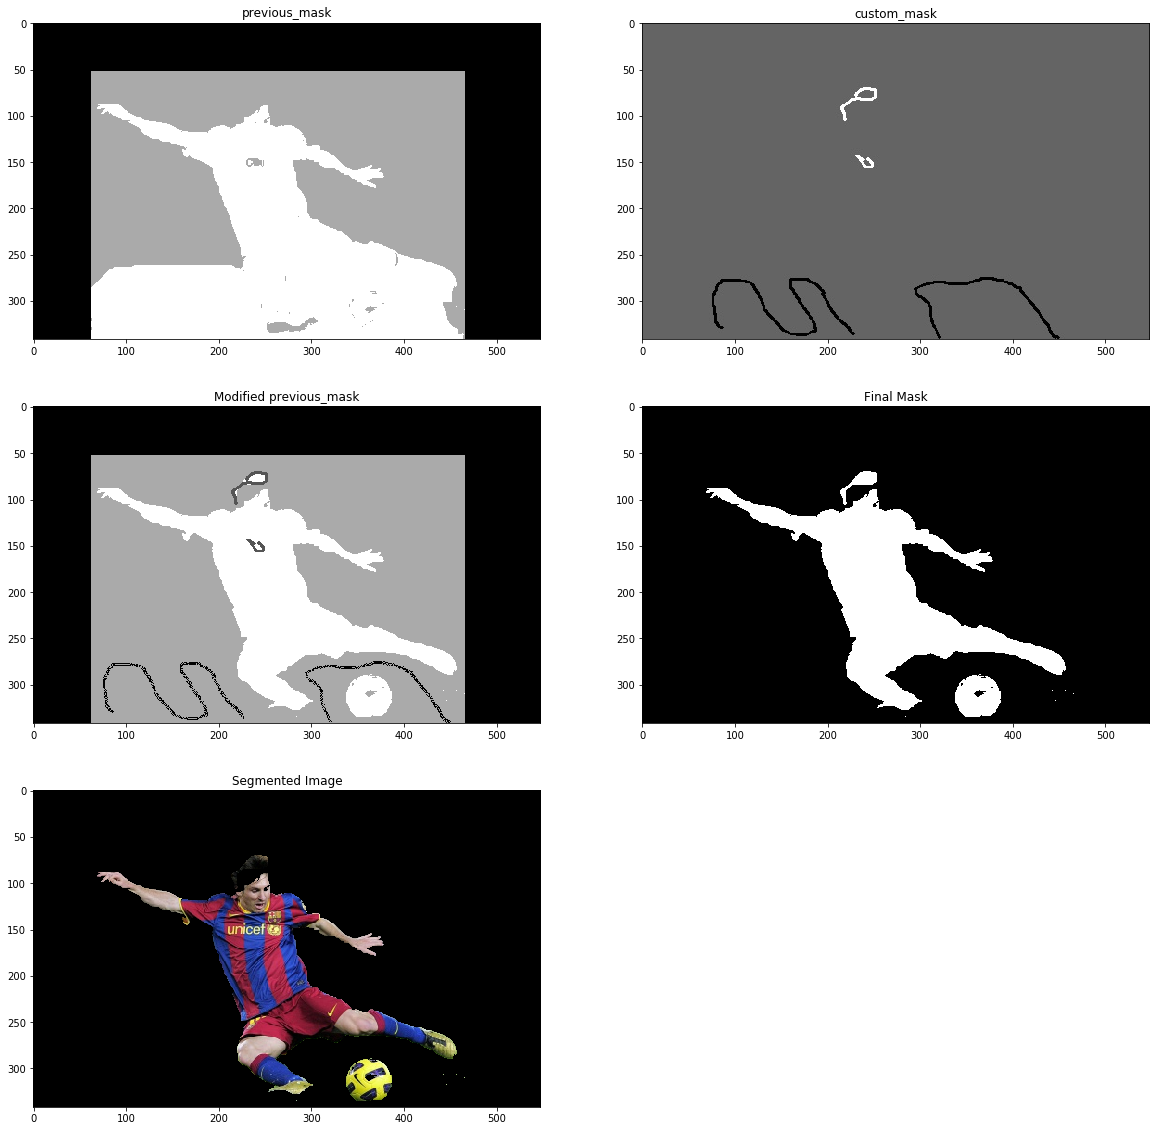

In [20]:
prev_mask = initial_mask.copy()
custom_mask = cv2.imread(basename +'mask' + imgname ,0)

# wherever it is marked white (sure foreground), change mask=1
# wherever it is marked black (sure background), change mask=0
prev_mask[custom_mask == 0] = 0
prev_mask[custom_mask > 245] = 1

new_mask, bgdModel, fgdModel = cv2.grabCut(img,prev_mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

new_mask_modified = np.where((new_mask==2)|(new_mask==0),0,1).astype('uint8')
img = imgorig*new_mask_modified [:,:,np.newaxis]

plt.figure(figsize=[20,20])
plt.subplot(321);plt.imshow(initial_mask.copy(), cmap = 'gray');plt.title('previous_mask')
plt.subplot(322);plt.imshow(custom_mask, cmap = 'gray');plt.title('custom_mask')
plt.subplot(323);plt.imshow(prev_mask, cmap = 'gray');plt.title('Modified previous_mask')
plt.subplot(324);plt.imshow(new_mask_modified, cmap = 'gray');plt.title('Final Mask')
plt.subplot(325);plt.imshow(img[:,:,::-1]);plt.title("Segmented Image")

###  <font style="color:rgb(34,169,134)"> Assignment: Full Grabcut Application</font>
We have splitted the full grabcut implementation into 3 parts, grabcut in rect mode, manual mask creation and finally grabcut in mask mode, your job is to perform all these steps in a single program and save the final segmented image. Make sure the user controls if it wants to refine the results with the mask mode or just save the rect mode results if the results are good.

In [ ]:
### ADD CODE HERE

